# Selecting a Twitter API

There are at least 7 python interfaces to the Twitter WEB Application Programming Interface (API).  We will use `tweepy`, since the [documentation is clear](http://www.tweepy.org/), and there are [interesting applications available to get started](http://adilmoujahid.com/posts/2014/07/twitter-analytics/
).

## Getting started

First you will need to install tweepy.  The most straightforward way is through the `pip` installation tool.  This can be run from the command line using:

    pip install tweepy
    
or from within a Canopy IPython shell:

    %bash pip install tweepy
    
If you get this Exception:

    TypeError: parse_requirements() got an unexpected keyword argument 'session'


Make sure you upgrade pip to the newest version:

    pip install --upgrade pip


Twitter uses the [OAuth protocol](https://dev.twitter.com/oauth/overview/faq) for more application approval.  Considering all of the applications that access Twitter (for example, when you use your Twitter account to login to a different website), this protocol prevents information like your password being passed through these intermediate accounts (as far as I understand...).  While this is a great security measure for intermediate client access, it adds an extra step for us before we can directly communicate with the API.  To access Twitter, you need to Create an App (https://apps.twitter.com); however, I've already created an app that we can all ping off of: `GWU_TEST_APP`.   To interact with `GWU_TEST_APP`, you'll need an access token.  [Request one here.](https://apps.twitter.com/app/7965526/keys)

Store your consumer key and comumer secret somewhere you'll remember them.  I'm storing mine in Python strings, but for security, not displaying this step:

    consumer_key = 'jrCYD....'
    consumer_secret = '...' 
    
**WTF difference between access/consumer?  Here's access token, consumer token discussion: http://stackoverflow.com/questions/20720752/whats-the-difference-between-twitter-consumer-key-and-access-token**

```
The consumer key is for your application and client tokens are for end users in your application's context. If you want to call in just the application context, then consumer key is adequate. You'd be rate limited per application and won't be able to access user data that is not public. With the user token context, you'll be rate limited per token/user, this is desirable if you have several users and need to make more calls than application context rate limiting allows. This way you can access private user data. Which to use depends on your scenarios.
```

## Example 1: Read Tweets Appearing on Homepage

With the `consumer_key` and `consumer_secret` stored, let's try a Hello World example from Tweepy's docs.  This will access the public tweets appearing on the User's feed as if they had logged in to twitter.  **For brevity, we'll only print the first two**.

In [1]:
consumer_key = 'jrCYD9dREozKRfchtkm6zg02Z'
consumer_secret = 'h0cWbg5TeV2AS1n5w33ZwALEQcS4JkC2rpOXNfIImOHL8hdFLg'

access_token ='718576069-CGK0f03Q94CkFysA6OJgJZeRBef2AGIh1bzceVl4'
access_token_secret = 'zdOaZWEncust1rFGKAWaj462VRUD6GMcU60plkCaobfEf'

import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for (idx, tweet) in enumerate(public_tweets[0:3]): #First 3 tweets in my public feed
    print 'TWEET %s:\n\n%s\n\n' % (idx, tweet.text)

TWEET 0:

RT @sbykov_work: Motley Fool listed #ProjectOrleans as 1 of the "5 Microsoft Projects to Watch in 2015" - http://t.co/hit4ECBd4S


TWEET 1:

.@karan shared his list of 9 people he wants to meet in 2015: https://t.co/NEZOE3cGfg

Here's my list from 2012: http://t.co/W3tJrIzkFN


TWEET 2:

Snapchat famous 😛 http://t.co/aYoo2U8wQN cc @msg http://t.co/x4cEQ2G9VY




When we used `tweet.text`, we implicitly used a python class defined by `tweepy`.

In [2]:
type(tweet)

tweepy.models.Status

There are many attributes associated with a `Status` object.  

In [3]:
tweet.__dict__.keys()

['contributors',
 'truncated',
 'text',
 'in_reply_to_status_id',
 'id',
 'favorite_count',
 '_api',
 'author',
 '_json',
 'coordinates',
 'entities',
 'in_reply_to_screen_name',
 'id_str',
 'retweet_count',
 'in_reply_to_user_id',
 'favorited',
 'source_url',
 'user',
 'geo',
 'in_reply_to_user_id_str',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'created_at',
 'in_reply_to_status_id_str',
 'place',
 'source',
 'extended_entities',
 'retweeted']

## Example 2: What's trending where?

According to the tweepy API, we can return the top 10 trending topics for a specific location, where the location is a WOEID (Yahoo Where on Earth ID).  The WOEID is a unique identifier, similar to zipcodes, but that expand worldwide.  For example, my hometown of Pittsburgh has a WOEID of 2473224.  You can search for WOEID's here: http://woeid.rosselliot.co.nz/

Let's return the top ten trending topics in Pittsburgh

In [4]:
top10 = api.trends_place(id=2473224)
top10

[{u'as_of': u'2015-02-24T16:53:32Z',
  u'created_at': u'2015-02-24T16:51:01Z',
  u'locations': [{u'name': u'Pittsburgh', u'woeid': 2473224}],
  u'trends': [{u'name': u'#DogTVShows',
    u'promoted_content': None,
    u'query': u'%23DogTVShows',
    u'url': u'http://twitter.com/search?q=%23DogTVShows'},
   {u'name': u'#TheVoice',
    u'promoted_content': None,
    u'query': u'%23TheVoice',
    u'url': u'http://twitter.com/search?q=%23TheVoice'},
   {u'name': u'#VoicePremiere',
    u'promoted_content': None,
    u'query': u'%23VoicePremiere',
    u'url': u'http://twitter.com/search?q=%23VoicePremiere'},
   {u'name': u'Fayette',
    u'promoted_content': None,
    u'query': u'Fayette',
    u'url': u'http://twitter.com/search?q=Fayette'},
   {u'name': u'Julie Andrews',
    u'promoted_content': None,
    u'query': u'%22Julie+Andrews%22',
    u'url': u'http://twitter.com/search?q=%22Julie+Andrews%22'},
   {u'name': u'WILD',
    u'promoted_content': None,
    u'query': u'WILD',
    u'url': u'h

The result is a JSON object, a human and machine readable data encoding format.  JSON is quite ubiquitious.  In Python, JSON objects tend to be nested dictionaries.  JSON stands for JavaScript Object Notation, because it's designed based on a subset of the JavaScript language; however, JSON is a data-encoding format implemented in many languages.  

Looking at this structure, we see that it's contained in a list.  Let's access the top ten tweet names:

In [5]:
top10[0]['trends']

[{u'name': u'#DogTVShows',
  u'promoted_content': None,
  u'query': u'%23DogTVShows',
  u'url': u'http://twitter.com/search?q=%23DogTVShows'},
 {u'name': u'#TheVoice',
  u'promoted_content': None,
  u'query': u'%23TheVoice',
  u'url': u'http://twitter.com/search?q=%23TheVoice'},
 {u'name': u'#VoicePremiere',
  u'promoted_content': None,
  u'query': u'%23VoicePremiere',
  u'url': u'http://twitter.com/search?q=%23VoicePremiere'},
 {u'name': u'Fayette',
  u'promoted_content': None,
  u'query': u'Fayette',
  u'url': u'http://twitter.com/search?q=Fayette'},
 {u'name': u'Julie Andrews',
  u'promoted_content': None,
  u'query': u'%22Julie+Andrews%22',
  u'url': u'http://twitter.com/search?q=%22Julie+Andrews%22'},
 {u'name': u'WILD',
  u'promoted_content': None,
  u'query': u'WILD',
  u'url': u'http://twitter.com/search?q=WILD'},
 {u'name': u'#TheBachelor',
  u'promoted_content': None,
  u'query': u'%23TheBachelor',
  u'url': u'http://twitter.com/search?q=%23TheBachelor'},
 {u'name': u'Wrestle

As you can see, there's alot of metadata that goes into even a simple tweet.  Let's cicyle trhough each of these trends, and print the `name` and website of each.

In [6]:
for trend in top10[0]['trends']:
    print trend['name'], trend['url']

#DogTVShows http://twitter.com/search?q=%23DogTVShows
#TheVoice http://twitter.com/search?q=%23TheVoice
#VoicePremiere http://twitter.com/search?q=%23VoicePremiere
Fayette http://twitter.com/search?q=Fayette
Julie Andrews http://twitter.com/search?q=%22Julie+Andrews%22
WILD http://twitter.com/search?q=WILD
#TheBachelor http://twitter.com/search?q=%23TheBachelor
WrestleMania http://twitter.com/search?q=WrestleMania
Michael Keaton http://twitter.com/search?q=%22Michael+Keaton%22
Lady Gaga http://twitter.com/search?q=%22Lady+Gaga%22


## Example 3: Streaming and Data Mining

This example follows from [Adil Moujahid's great tweepy examples](http://adilmoujahid.com/posts/2014/07/twitter-analytics/)

Twitter offers a [Streaming API](https://dev.twitter.com/streaming/overview) to make it easier to stream tweets.  The Stream API encapsulates some pain points of REST access to ensure that Stream calls don't exceed the rate limit.  Think of them as Twitter's suggested, novice, means to stream data.  You don't have to use them, but they're recommend.  There are three stream types:

    Public Streams: Streams of public data flowthing through Twitter.  Suitable for followign specific users, topics or for data mining.
    
    User Streams: Single-user streams.  Containing roughly all of the data corresponding with a single user's view of Twitter.
    
    Site Streams:  The multi-user version of user streams.  
    
We'll resist the temptation to mess with our friend's Twitter accounts, and focus soley on Public Streams.

In [10]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status



#This handles Twitter authetification and the connection to Twitter Streaming API
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)

#This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
stream.filter(track=['python', 'javascript', 'ruby'])

print stream

KeyboardInterrupt: 

### Alchemy

The Alchemy API is an artificial intelligence toolkit for machine learning needs like facial recognition, sentiment analysis and so forth.  IIUC it's built in some part over scikit-learn, and has python roots.  With a Python SDK, it's a great opportunity to do some bigboy analysis of these twitter streams.

http://www.alchemyapi.com/

In [43]:
import os
os.chdir('/home/glue/Desktop/alchemyapi_python/')
from alchemyapi import AlchemyAPI as alcapi
from types import MethodType

ALCAPI = alcapi() #<-- Instantiate
print 'The available attributes and methods for Alchemy API are:\n' 
sorted(alcapi.__dict__.keys())

The available attributes and methods for Alchemy API are:



['BASE_URL',
 'ENDPOINTS',
 '_AlchemyAPI__analyze',
 '__doc__',
 '__init__',
 '__module__',
 'author',
 'category',
 'combined',
 'concepts',
 'entities',
 'feeds',
 'imageExtraction',
 'imageTagging',
 'keywords',
 'language',
 'microformats',
 'relations',
 's',
 'sentiment',
 'sentiment_targeted',
 'taxonomy',
 'text',
 'text_raw',
 'title']

In [39]:
help(alcapi.sentiment)

Help on method sentiment in module alchemyapi:

sentiment(self, flavor, data, options={}) unbound alchemyapi.AlchemyAPI method
    Calculates the sentiment for text, a URL or HTML.
    For an overview, please refer to: http://www.alchemyapi.com/products/features/sentiment-analysis/
    For the docs, please refer to: http://www.alchemyapi.com/api/sentiment-analysis/
    
    INPUT:
    flavor -> which version of the call, i.e. text, url or html.
    data -> the data to analyze, either the text, the url or html code.
    options -> various parameters that can be used to adjust how the API works, see below for more info on the available options.
    
    Available Options:
    showSourceText -> 0: disabled (default), 1: enabled
    
    OUTPUT:
    The response, already converted from JSON to a Python object.



In [76]:
FOXARTICLE = 'http://www.foxnews.com/us/2015/02/24/southern-california-commuter-train-crashes-into-truck-injuries-reported/'
GOODARTICLE = 'http://www.goodnewsnetwork.org/company-gives-employees-1000-job-well-done/'

badnews = ALCAPI.sentiment('url', FOXARTICLE)
goodnews = ALCAPI.sentiment('url', GOODARTICLE)

print 'Article from fox news:\n\t', badnews['docSentiment']
print '\n'
print 'Article from goodnews news:\n\t', goodnews['docSentiment']

Article from fox news:
	{u'mixed': u'1', u'score': u'-0.289811', u'type': u'negative'}


Article from goodnews news:
	{u'mixed': u'1', u'score': u'0.411121', u'type': u'positive'}


### Image Extraction

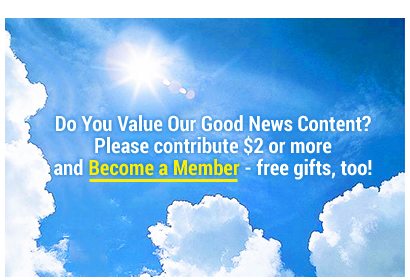

In [71]:
from IPython.display import Image
image_extract = ALCAPI.imageExtraction('url', GOODARTICLE)

# Use ipython's display system to render the image
Image(image_extract['image'])

Looks like it found an ad on the page, not the actual main image.  Let's try the "always infer" option which is supposed to be more rigorous in getting algorithms (although I don't know how):

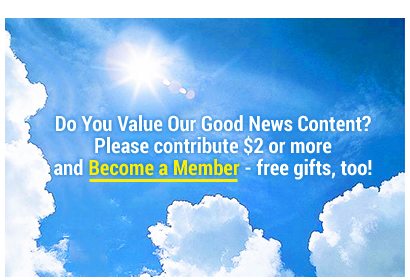

In [74]:
image_extract = ALCAPI.imageExtraction('url', GOODARTICLE, options=dict(extractMode='always-infer'))

# Use ipython's display system to render the image
Image(image_extract['image'])

This is an add appearing at the bottom of the page!  The actual image we want is:

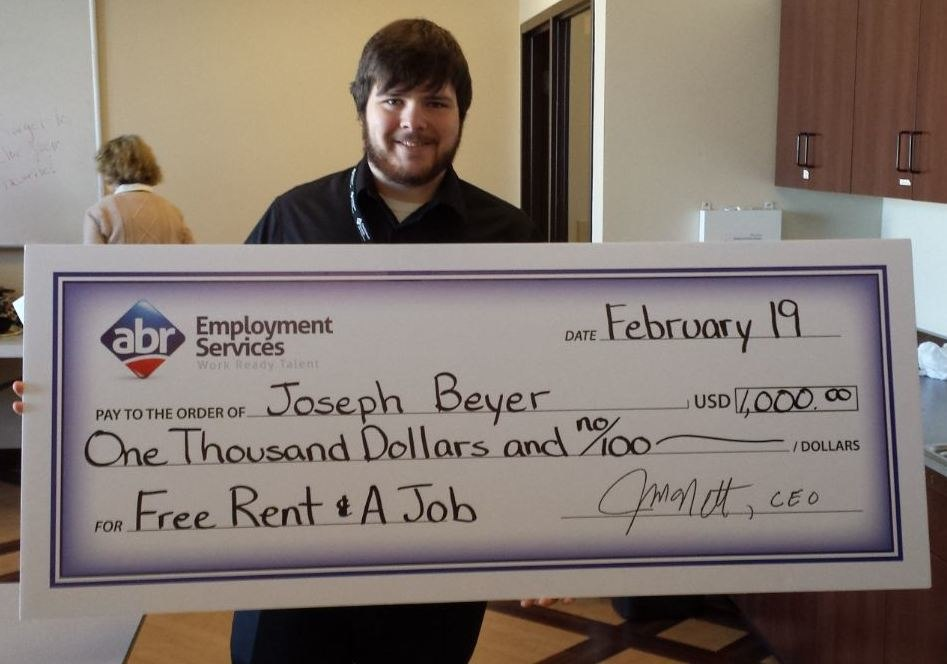

In [78]:
Image('http://www.goodnewsnetwork.org/wp-content/uploads/2015/02/Joseph-Beyer-giant-check-for-1000-submitted.jpg')

**Code below changes notebook formatting/style**

In [61]:
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())